In [10]:
## IMPORTS

%matplotlib inline
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib_venn import venn3_unweighted
import matplotlib.font_manager as font_manager
from matplotlib.font_manager import FontProperties
import seaborn as sns

In [11]:
DATA_PATH = '/Users/ninazomorrodnia/Desktop/Bachelorprojekt/RNAseq pathway analysis/All each genotype/'
#DATA_PATH = '/home/williamtheodor/Documents/Private/Drosophila/Data/'
FILE_PATH = DATA_PATH + 'Reactome pathways RNA seq (all) sig. padj.xlsx'

# Reading in RNA seq all pathways data as a Pandas DataFrame
df_RNASEQ_pathways = pd.read_excel(FILE_PATH)
df_RNASEQ_pathways.head()

,Reactome pathways,WT,FDR_WT,fold_enrich_WT,HR3,FDR_HR3,fold_enrich_HR3,TOR,FDR_TOR,fold_enrich_TOR
0,Metabolism,x,6.680000e-25,2.64,x,1.280000e-13,2.23,NaN,NaN,NaN
1,Metabolism of lipids,x,5.690000e-13,3.19,x,5.470000e-10,2.94,x,NaN,NaN
2,Metabolism of vitamins and cofactors,x,5.580000e-07,4.04,x,8.130000e-07,4.07,x,NaN,NaN
3,Metabolism of RNA,x,6.850000e-06,00:08:00,NaN,NaN,NaN,NaN,NaN,NaN
4,Peroxisomal lipid metabolism,x,1.240000e-04,10.13,x,3.500000e-03,8.46,NaN,NaN,NaN


In [12]:
dict = {
    'WT': 'b',
    'HR3': 'k',
    'TOR': 'r',
    'T1': '^',
    'T6': 'o'
}

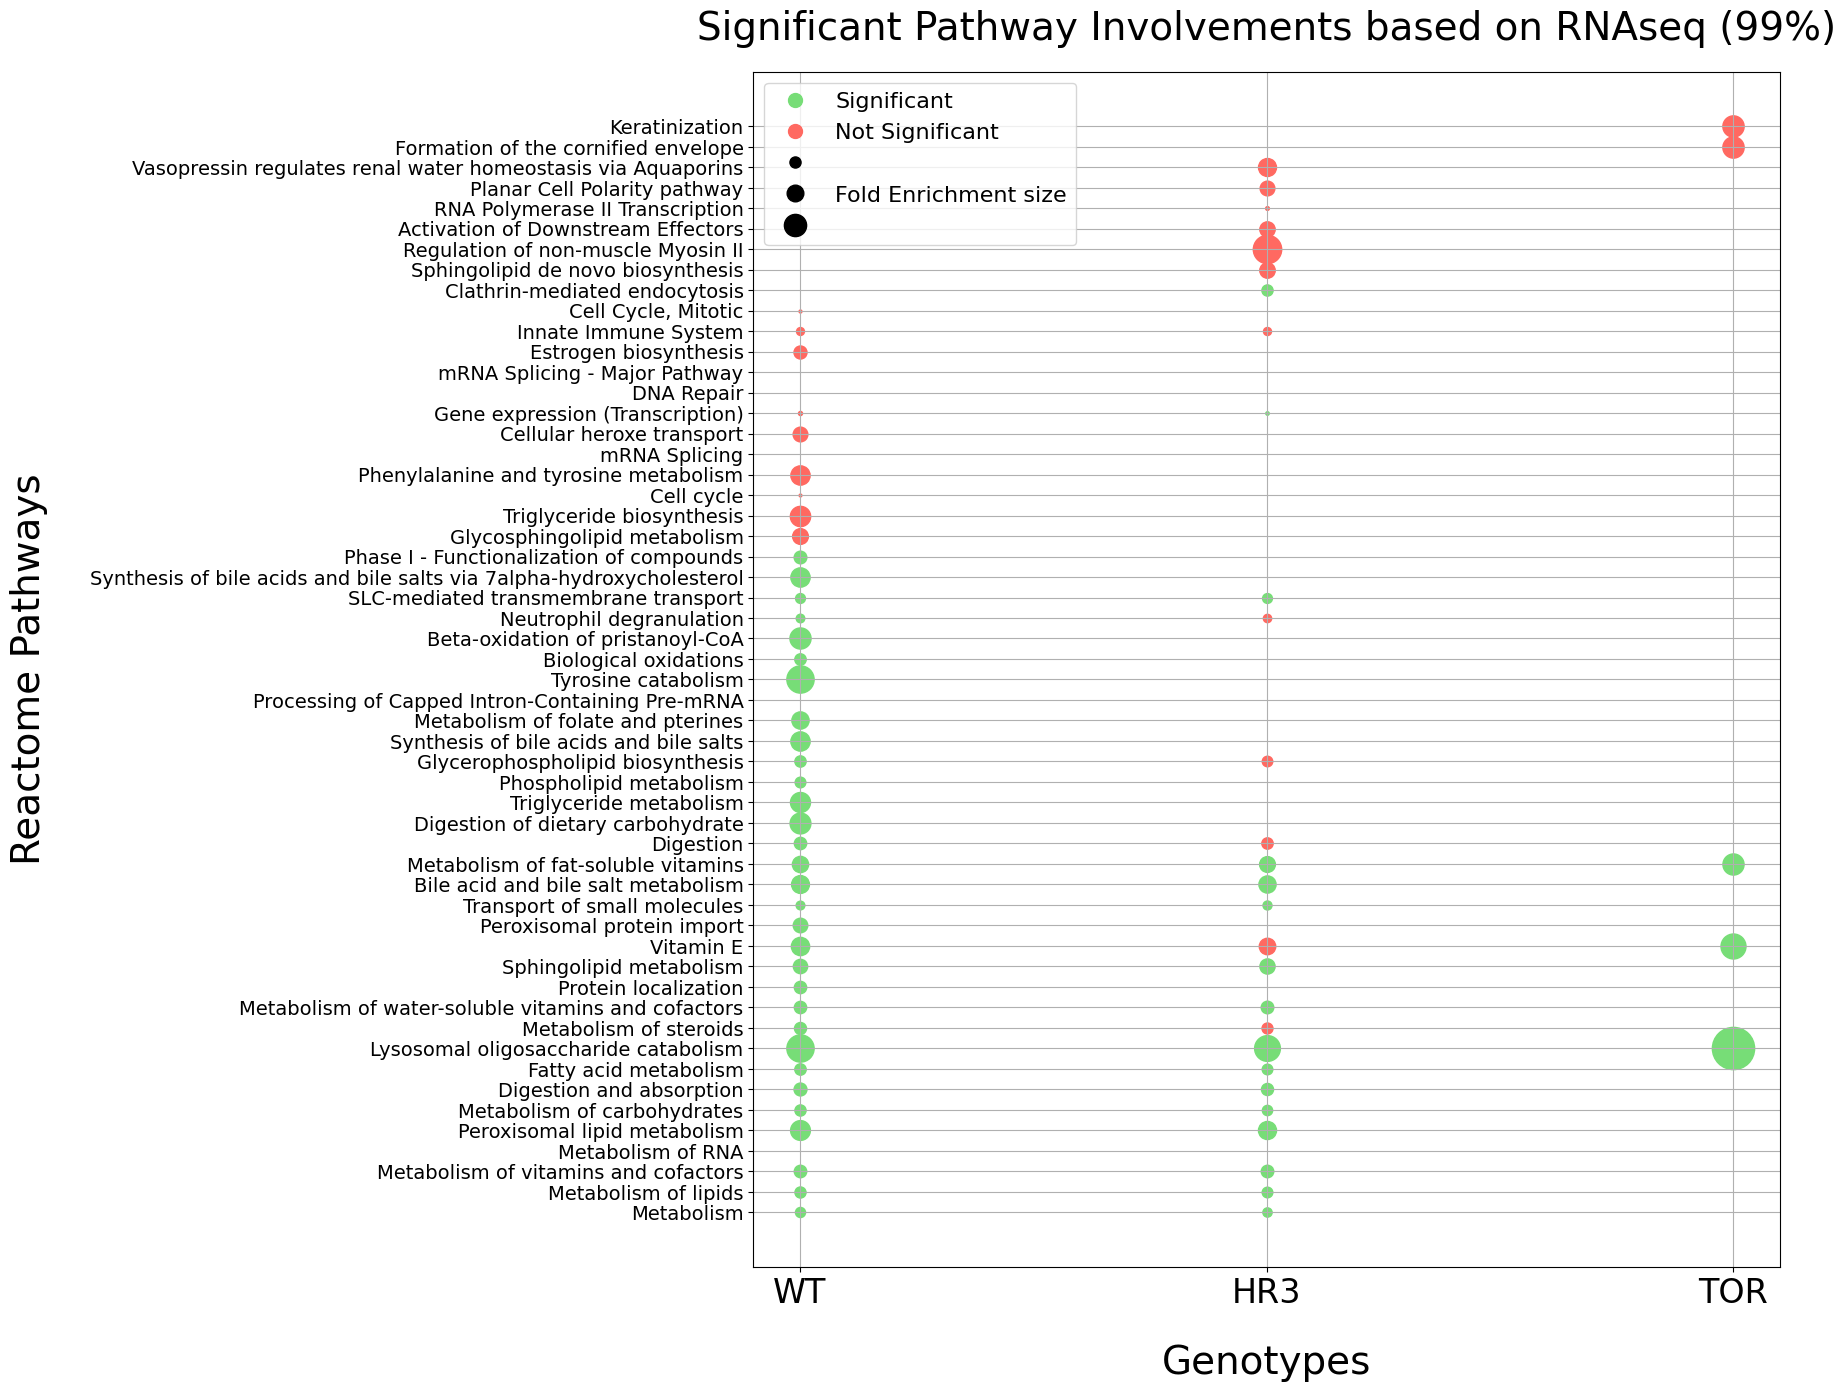

In [13]:
red_color = '#FF6961'
green_color = '#77DD77'

genotypes = ['WT', 'HR3', 'TOR']

fig, ax = plt.subplots(1, 1, figsize=(18, 14))
c = 20

for i, pathway in enumerate(df_RNASEQ_pathways['Reactome pathways']):
    row = df_RNASEQ_pathways.iloc[i]
    
    x = [1, 2, 3]
    
    for j, genotype in enumerate(genotypes):
        fold_enrich = row[f'fold_enrich_{genotype}']
        fold_enrich = np.nan_to_num(fold_enrich)  # Convert NaN to 0
        fold_enrich = fold_enrich if isinstance(fold_enrich, (int, float)) else 0
        
        fdr = row[f'FDR_{genotype}']
        color = green_color if fdr < 0.01 else red_color  # Choose colors based on FDR significance
        
        ax.scatter(x[j], i, color=color, marker='o', s=c * fold_enrich)

ax.set_yticks(np.arange(len(df_RNASEQ_pathways)), df_RNASEQ_pathways['Reactome pathways'], fontsize=14)
ax.set_xticks([1, 2, 3], genotypes, fontsize=24)
ax.grid(True)

ax.set_ylabel('Reactome Pathways', fontsize=28, labelpad=30)
ax.set_xlabel('Genotypes', fontsize=28, labelpad=25)


small_dot = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=8, label='')
medium_dot = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=12, label='Fold Enrichment size')
large_dot = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=16, label='')

green_dot = mlines.Line2D([], [], color=green_color, marker='o', linestyle='None',
                          markersize=10, label='Significant')
red_dot = mlines.Line2D([], [], color=red_color, marker='o', linestyle='None',
                          markersize=10, label='Not Significant')

ax.legend(handles=[green_dot, red_dot, small_dot, medium_dot, large_dot], fontsize=16, loc='upper left')

ax.set_title('Significant Pathway Involvements based on RNAseq (99%)', fontsize=28, y=1.02)
plt.tight_layout()
plt.show()

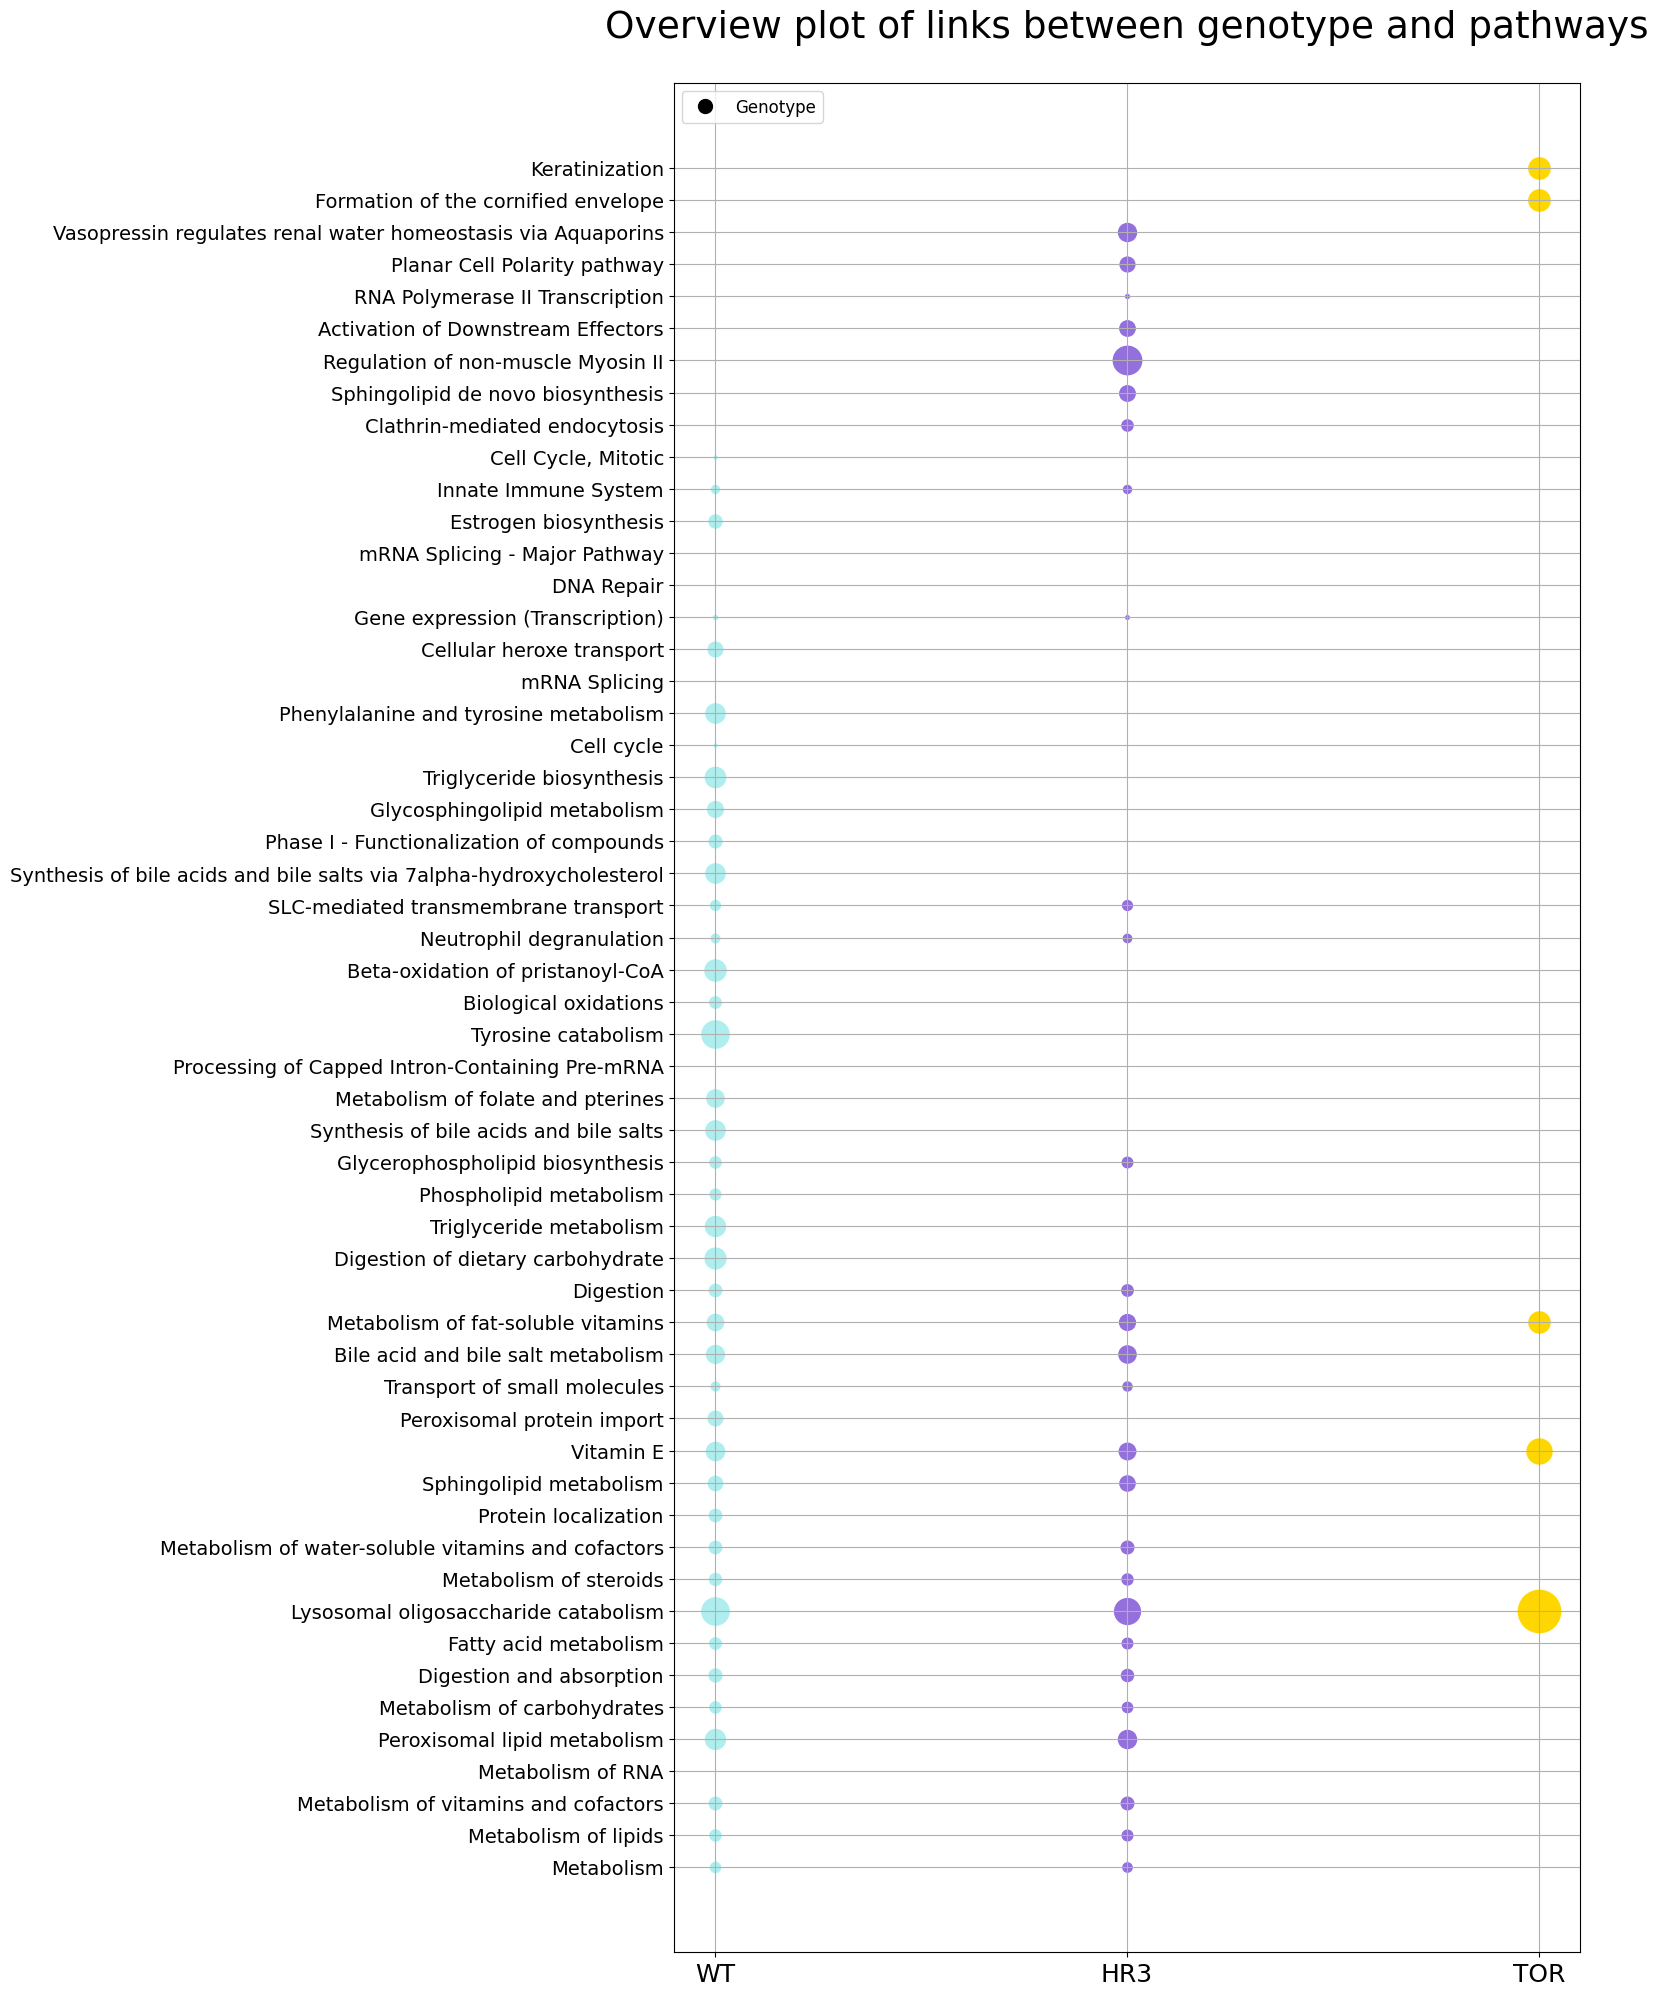

In [14]:
import math
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

genotypes = ['WT', 'HR3', 'TOR']

# Define the color_dict for each genotype
color_dict = {
    'WT': 'paleturquoise',
    'HR3': 'mediumpurple',
    'TOR': 'gold'
}

fig, ax = plt.subplots(1, 1, figsize=(16, 20))
c = 20

for i, pathway in enumerate(df_RNASEQ_pathways['Reactome pathways']):
    row = df_RNASEQ_pathways.iloc[i]
    
    x = [1, 2, 3]
    
    for j, genotype in enumerate(genotypes):
        fold_enrich = row[f'fold_enrich_{genotype}']
        fold_enrich = np.nan_to_num(fold_enrich)  # Convert NaN to 0
        fold_enrich = fold_enrich if isinstance(fold_enrich, (int, float)) else 0
        
        fdr = row[f'FDR_{genotype}']
        color = color_dict[genotype] if fdr < 0.05 else 'gray'  # Use color_dict for genotypes with FDR < 0.05
        
        ax.scatter(x[j], i, color=color, marker='o', s=c * fold_enrich)

ax.set_yticks(np.arange(len(df_RNASEQ_pathways)), df_RNASEQ_pathways['Reactome pathways'], fontsize=14)
ax.set_xticks([1, 2, 3], genotypes, fontsize=18)
ax.grid(True)

legend_dot = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=10, label='Genotype')
ax.legend(handles=[legend_dot], fontsize=12, loc='upper left')

ax.set_title('Overview plot of links between genotype and pathways', fontsize=27, y=1.02)
plt.tight_layout()
plt.show()


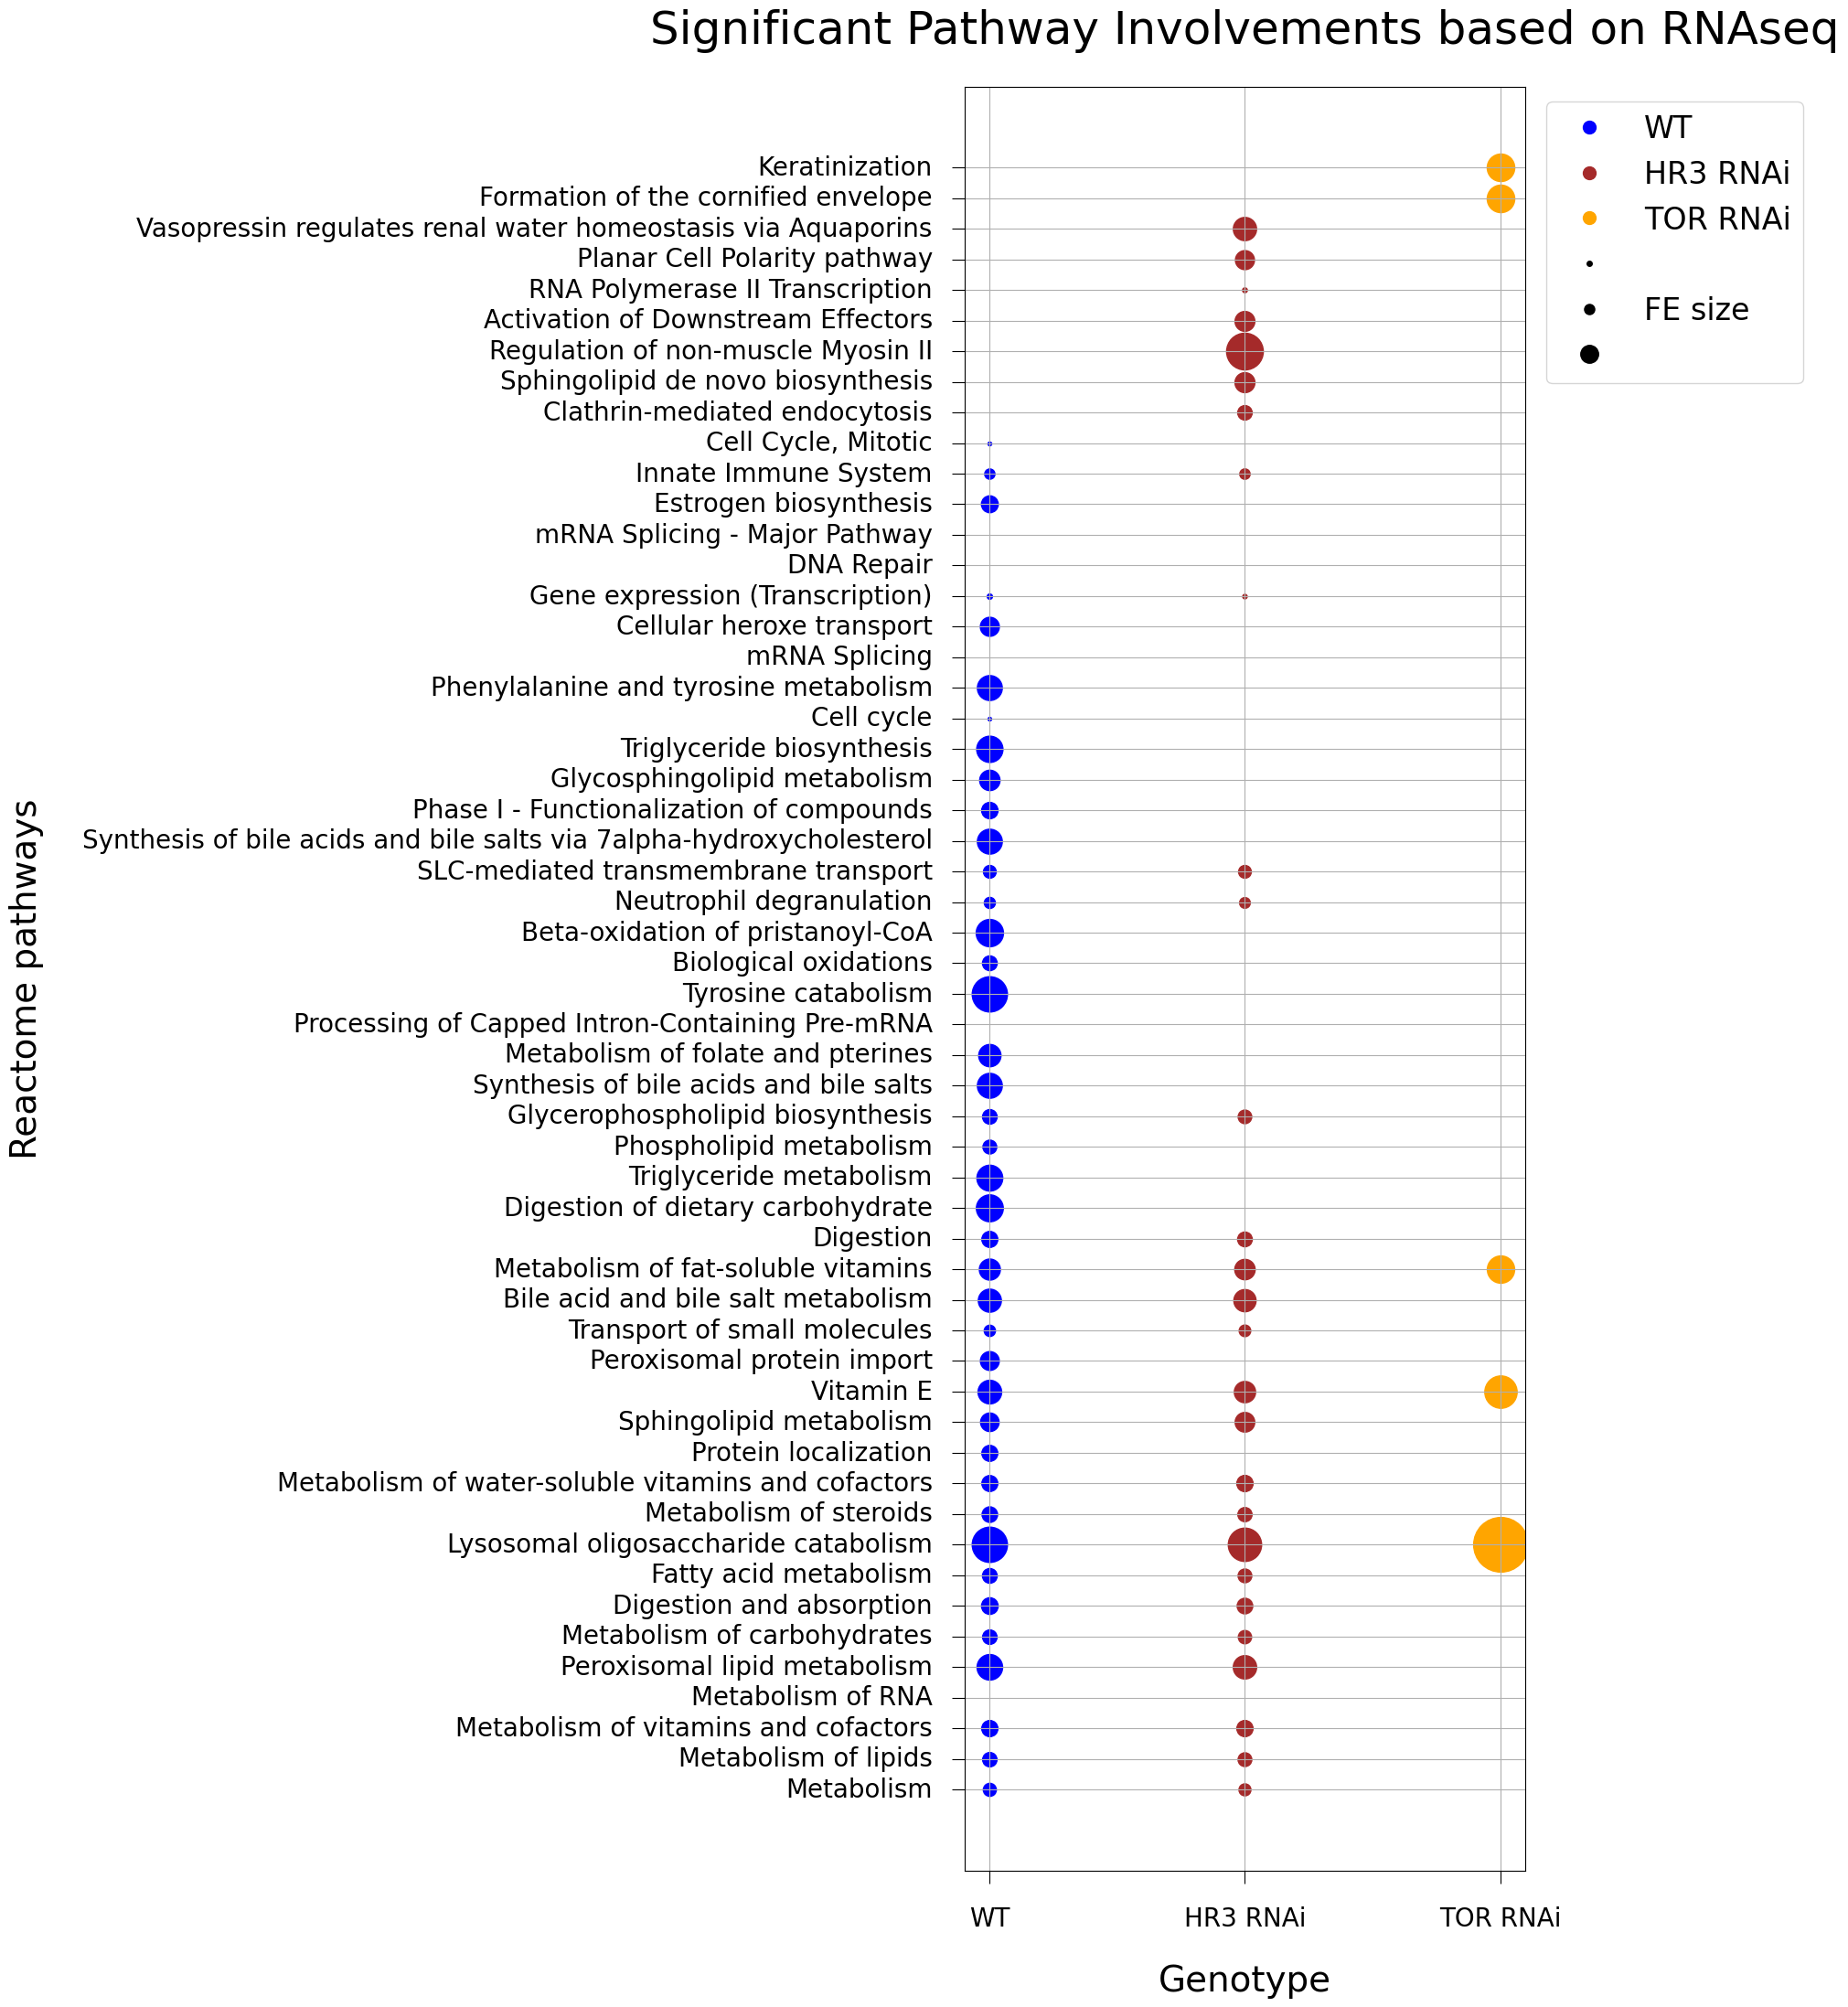

In [15]:
import math
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

genotypes = ['WT', 'HR3', 'TOR']

# Define the color_dict for each genotype
color_dict_95 = {
    'WT': 'blue',
    'HR3': 'brown',
    'TOR': 'orange'
}

color_dict = color_dict_95.copy()

fig, ax = plt.subplots(1, 1, figsize=(20, 22))
c = 40  # Increase the value of c for larger spacing between dots
dot_offset = 6  # Horizontal offset between dots

for i, pathway in enumerate(df_RNASEQ_pathways['Reactome pathways']):
    row = df_RNASEQ_pathways.iloc[i]
    
    x = [1, 2, 3]
    
    for j, genotype in enumerate(genotypes):
        fold_enrich = row[f'fold_enrich_{genotype}']
        fold_enrich = np.nan_to_num(fold_enrich)  # Convert NaN to 0
        fold_enrich = fold_enrich if isinstance(fold_enrich, (int, float)) else 0
        
        fdr = row[f'FDR_{genotype}']
        color = color_dict[genotype] if fdr < 0.05 else 'gray'  # Use color_dict for genotypes with FDR < 0.05
        
        ax.scatter(x[j], i, color=color, marker='o', s=c * fold_enrich)

ax.set_yticks(np.arange(len(df_RNASEQ_pathways)), df_RNASEQ_pathways['Reactome pathways'], fontsize=14)
ax.set_xticks([1,2,3], ['WT', 'HR3 RNAi', 'TOR RNAi'], fontsize=16)
ax.grid(True)

# Set the x-axis labels to be centered below the data points
ax.set_xlabel('Genotype', fontsize=28, labelpad=25)
ax.set_ylabel('Reactome pathways', fontsize=28, labelpad=30)

# Move the genotype labels further down by setting their y-position
ax.set_xticklabels(['WT', 'HR3 RNAi', 'TOR RNAi'], fontsize=20, ha='center', va='top', position=(0, -0.002))
# Increase the spacing between the y-axis labels by adding additional padding
ax.set_yticklabels(df_RNASEQ_pathways['Reactome pathways'], fontsize=20, va='center', linespacing=2)

# Set longer tick marks and move y-axis labels away from the plot
ax.tick_params(axis='both', which='both', length=10, pad=15)

wt_dot = mlines.Line2D([], [], color=color_dict_95['WT'], marker='o', linestyle='None',
                          markersize=10, label='WT')
hr3_dot = mlines.Line2D([], [], color=color_dict_95['HR3'], marker='o', linestyle='None',
                          markersize=10, label='HR3 RNAi')
tor_dot = mlines.Line2D([], [], color=color_dict_95['TOR'], marker='o', linestyle='None',
                          markersize=10, label='TOR RNAi')

small_dot = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=4, label='')
medium_dot = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=8, label='FE size')
large_dot = mlines.Line2D([], [], color='k', marker='o', linestyle='None', markersize=14, label='')

#ax.legend(handles=[legend_dot], fontsize=40, loc='upper left')
ax.legend(handles=[wt_dot, hr3_dot, tor_dot, small_dot, medium_dot, large_dot], fontsize=24, bbox_to_anchor=(1.01, 1.))

# Adjust the spacing between the y-axis labels and the plot
plt.subplots_adjust(left=0.2)  # Increase the left margin

ax.set_title('Significant Pathway Involvements based on RNAseq', fontsize=36, y=1.02)
plt.tight_layout()
plt.show()

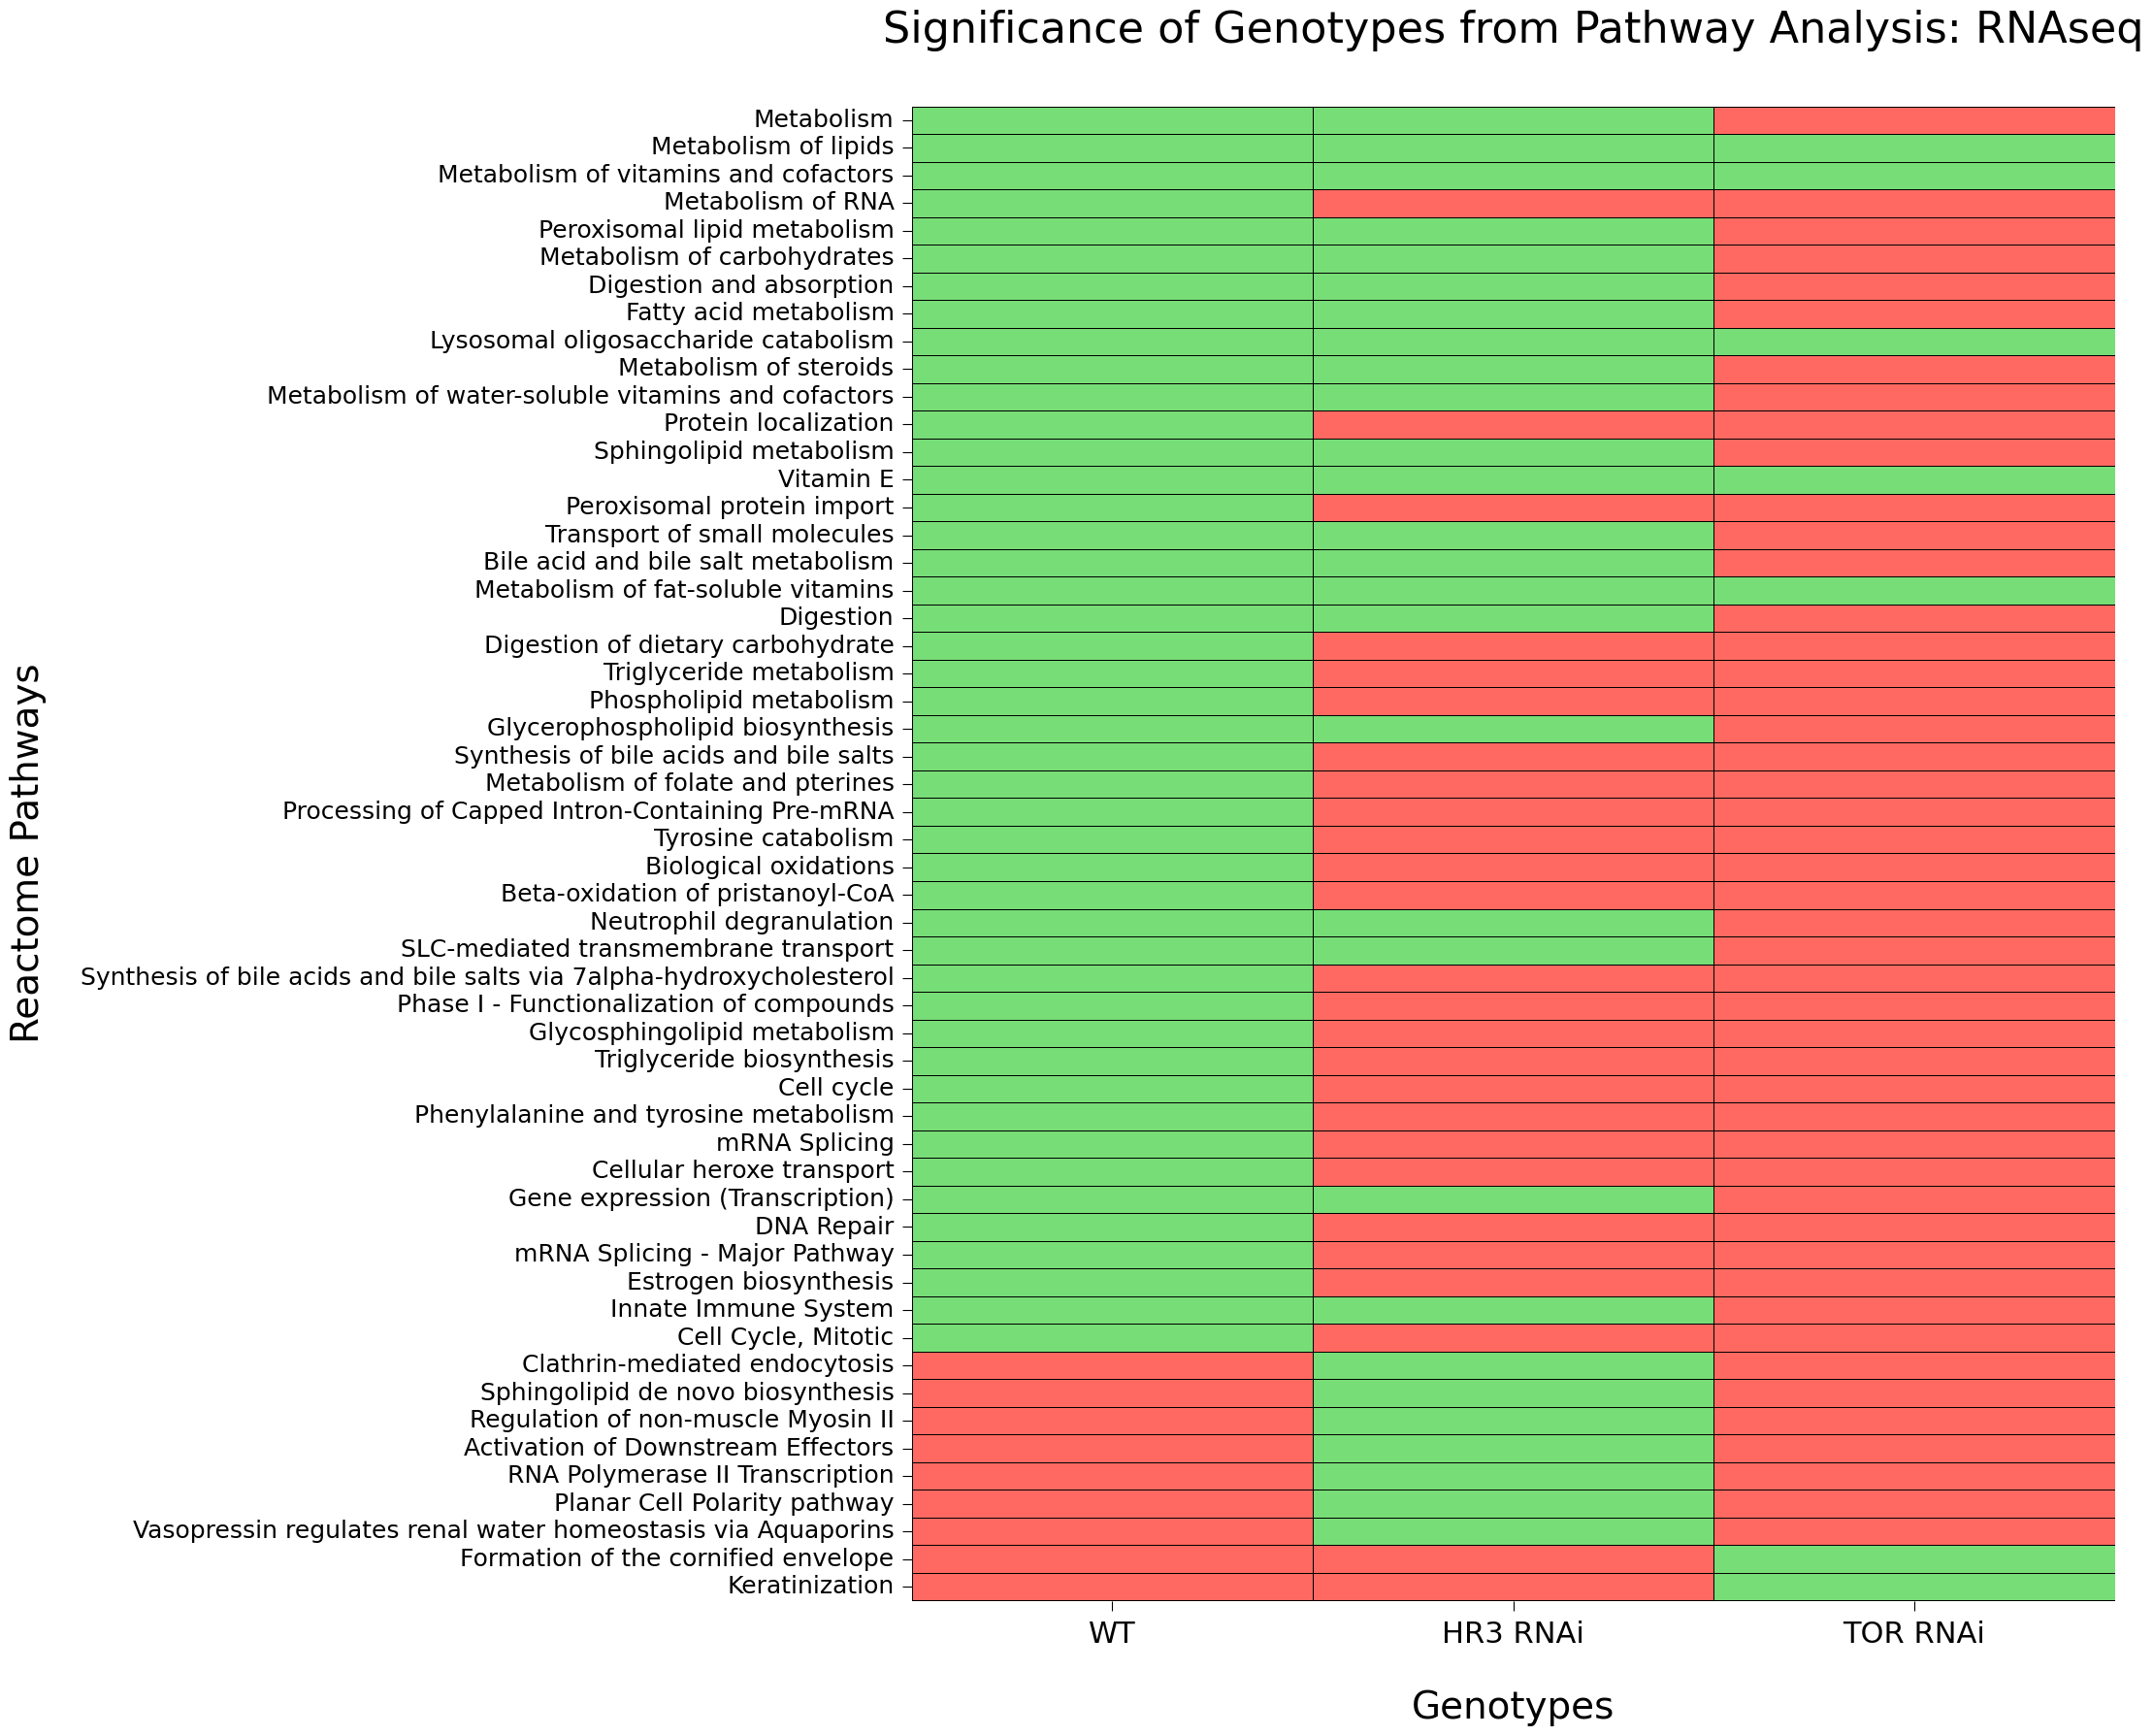

In [22]:
font = FontProperties(family='DejaVu Sans', size=18)

# Define the pathway and genotype labels
pathway_labels = df_RNASEQ_pathways['Reactome pathways']
genotype_labels = ['WT', 'HR3 RNAi', 'TOR RNAi']

wt_pathways = df_RNASEQ_pathways['WT']
hr3_pathways = df_RNASEQ_pathways['HR3']
tor_pathways = df_RNASEQ_pathways['TOR']


# Create the figure with larger figsize
fig, ax = plt.subplots(figsize=(16, 20))  # Adjust the values as needed

# Create a presence/absence matrix
presence_matrix = []
for i, pathway in enumerate(pathway_labels):
    presence_row = []
    for genotype in genotype_labels:
        if (genotype == 'WT' and wt_pathways[i] == 'x') or \
           (genotype == 'HR3 RNAi' and hr3_pathways[i] == 'x') or \
           (genotype == 'TOR RNAi' and tor_pathways[i] == 'x'):
            presence_row.append(1)  # Green
        else:
            presence_row.append(0)  # Red
    presence_matrix.append(presence_row)

# Create a dataframe from the presence matrix
df = pd.DataFrame(presence_matrix, columns=genotype_labels, index=pathway_labels)

# Create the heatmap using seaborn with red and green colors
cmap = sns.color_palette(['#FF6961', '#77DD77'])
sns.heatmap(df, cmap=cmap, cbar=False, linewidths=0.5, linecolor='black', annot=False)

# Customize the plot
plt.xlabel('Genotypes')
plt.ylabel('Pathways')

# Adjust the position of the y-axis label
plt.ylabel('Reactome Pathways', labelpad=25, size=28)
plt.xlabel('Genotypes', labelpad=30, size=28)

# Increase the fontsize of 'WT', 'HR3 RNAi', and 'TOR RNAi' labels
ax.tick_params(axis="x", which="both", labelsize=22, pad=8, length=7)  # Adjust the fontsize as needed
ax.tick_params(axis="y", which="both", labelsize=18, pad=6, length=7)  # Adjust the fontsize as needed

# Set title and adjust plot layout
title = plt.title('Significance of Genotypes from Pathway Analysis: RNAseq', fontproperties=font, size=32, pad=25, y=1.02)  # Increase the 'pad' value to add more spacing

# Show the plot
plt.show()

In [17]:
len(pathway_labels)

54

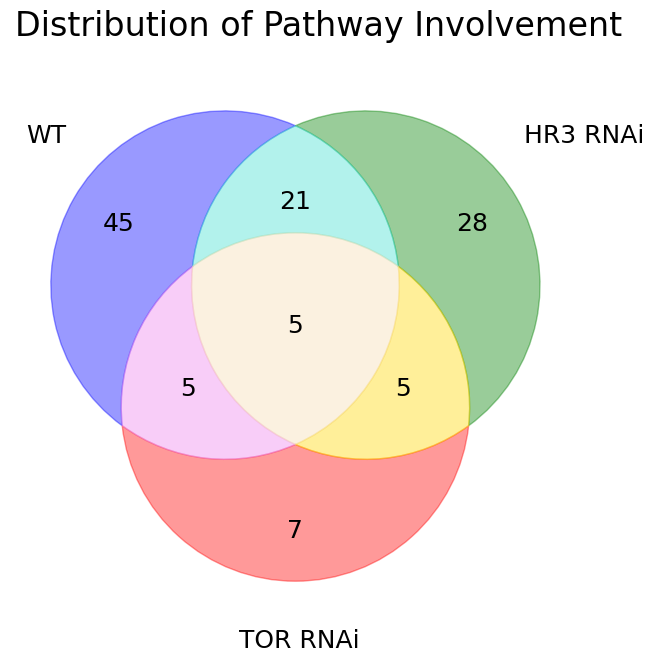

In [18]:
# Define the pathway and genotype labels
pathway_labels = df_RNASEQ_pathways['Reactome pathways']
genotype_labels = ['WT', 'HR3 RNAi', 'TOR RNAi']

wt_labels = df_RNASEQ_pathways['WT']
hr3_labels = df_RNASEQ_pathways['HR3']
tor_labels = df_RNASEQ_pathways['TOR']

wt_pathways = set([label for i, label in enumerate(pathway_labels) if wt_labels[i] == 'x'])
hr3_pathways = set([label for i, label in enumerate(pathway_labels) if hr3_labels[i] == 'x'])
tor_pathways = set([label for i, label in enumerate(pathway_labels) if tor_labels[i] == 'x'])


# Calculate pathway counts
wt_count = len(wt_pathways)
hr3_count = len(hr3_pathways)
tor_count = len(tor_pathways)
wt_hr3_count = len(wt_pathways.intersection(hr3_pathways))
wt_tor_count = len(wt_pathways.intersection(tor_pathways))
hr3_tor_count = len(hr3_pathways.intersection(tor_pathways))
wt_hr3_tor_count = len(wt_pathways.intersection(hr3_pathways, tor_pathways))

# Create the figure with larger figsize
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the values as needed

# Create the Venn diagram
venn = venn3_unweighted(subsets=(wt_count, hr3_count, wt_hr3_count, tor_count,
                                 wt_tor_count, hr3_tor_count, wt_hr3_tor_count),
                        set_labels=('WT', 'HR3 RNAi', 'TOR RNAi'))

# Customize the diagram
venn.get_label_by_id('100').set_text(f'{wt_count}')
venn.get_label_by_id('010').set_text(f'{hr3_count}')
venn.get_label_by_id('001').set_text(f'{tor_count}')
venn.get_label_by_id('110').set_text(f'{wt_hr3_count}')
venn.get_label_by_id('101').set_text(f'{wt_tor_count}')
venn.get_label_by_id('011').set_text(f'{hr3_tor_count}')
venn.get_label_by_id('111').set_text(f'{wt_hr3_tor_count}')

# Set colors for each subset
venn.get_patch_by_id('100').set_color('blue')       # Only WT
venn.get_patch_by_id('010').set_color('green')    # Only HR3 RNAi
venn.get_patch_by_id('001').set_color('red')     # Only TOR RNAi
venn.get_patch_by_id('110').set_color('turquoise')        # WT and HR3 RNAi
venn.get_patch_by_id('101').set_color('violet')        # WT and TOR RNAi
venn.get_patch_by_id('011').set_color('gold')          # HR3 RNAi and TOR RNAi
venn.get_patch_by_id('111').set_color('wheat')          # WT, HR3 RNAi, and TOR RNAi


# Set font properties for the labels
font = FontProperties(family='DejaVu Sans', size=18)
for text in venn.set_labels:
    text.set_fontproperties(font)
    if text.get_text() == 'WT':
        text.set_position((-0.56, 0.45))
    elif text.get_text() == 'HR3 RNAi':
        text.set_position((0.56, 0.45))
    elif text.get_text() == 'TOR RNAi':
        text.set_position((0.01, -0.74))
    

    
only_WT = venn.get_label_by_id('100').set_fontproperties(font)
only_HR3_RNAi = venn.get_label_by_id('010').set_fontproperties(font)
only_TOR_RNAi = venn.get_label_by_id('001').set_fontproperties(font)
WT_HR3_RNAi = venn.get_label_by_id('110').set_fontproperties(font)
WT_TOR_RNAi = venn.get_label_by_id('101').set_fontproperties(font)
HR3_RNAi_TOR_RNAi = venn.get_label_by_id('011').set_fontproperties(font)
all_genotypes = venn.get_label_by_id('111').set_fontproperties(font)


# Set title and adjust plot layout
title = plt.title('Distribution of Pathway Involvement', fontproperties=font, size=24, pad=25)  # Increase the 'pad' value to add more spacing
title.set_position([0.54, 5])  # Set the position of the title to be centered

plt.subplots_adjust(top=0.8)  # Adjust the top margin to increase the spacing

# Save the plot to a file
plt.savefig('venn_plot_pathway_oldphospho.png')

plt.show()